# Play

## Часть 1

In [3]:
# Import base libraries 
import pandas as pd
import numpy as np


# Vizualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns


# Natural language toolkit 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
import re
import string


# Model preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Import model
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


# Deep learning libraries
from torch.optim import Adam
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch


# Progress bar
from tqdm import tqdm


# Memory Manager
import gc


# Counter
from collections import Counter

In [2]:
#Считываю csv файл
df = pd.read_csv('test.csv')
df

,title,text,topic
0,Британцы отмечают двухлетие смерти Дианы,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир
1,Еще одно землетрясение в Турции: один человек ...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир
2,Российские национал-большевики убирают террито...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир
3,Киргизия ведет бои на границах с Таджикистаном...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир
4,Литва засудила участников переворота 91 года,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир
...,...,...,...
432153,Россия предложила Китаю участвовать в судьбе р...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир
432154,Моуринью сравнил футболистов с мебелью,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Спорт
432155,Путин предостерег от запретов рэп-концертов,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Культура
432156,«Желтые жилеты» прорвали кордон полиции под «М...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир


### Сделаем бейслайн, чтобы понять, какой результат можно получить с помощью самых простых подходов.

In [325]:
# Функция предобработки текста
def clean(text):
    # Перевод в нижний регистр.
    text = text.lower()
    # При импортировании DF появились маска.
    text = text.replace('<?xml version="1.0" encoding="utf-8"?>\n<conversion><person>', '', 1) 
    text = text.replace('</person></conversion>', '', 2)
    text = text.replace('\xa0', ' ', 2)
    text = text.replace('\n', ' ', 2)
    # Удаляем ссылки.
    text = re.sub(r'www\S+', "", text) 
    text = re.sub(r"(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)", "", text)
    # Удаляем упоминания пользователей и хэштеги.
    text = re.sub(r'@\w+','',text) 
    text = re.sub(r'#\w+', '', text)
    # Удаляем числа и знаки пунктуации.
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'<.*?>','', text)
    text = re.sub(r'«*»*:*,*"*-*','', text) 
    text = text.strip(' ')
    
    return text

In [326]:
# Преобразую колонку с предобработанным текстом.
df["text"] = df["text"].apply(clean)
# Титл нам пригодится позже

In [29]:
# uncomment
stopwords.words('russian')

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [30]:
# Create lemmatizer object
wn_lemmatizer = WordNetLemmatizer()

In [31]:
# Применяем лемматизацию
lemmatized_text = []
for i in df['text']:
    lemmatized_text.append(' '.join([wn_lemmatizer.lemmatize(word) for word in i.split()]))

In [32]:
reg_tokenizer = RegexpTokenizer('\w+')

In [33]:
# Применяем токенизация
tokenized_text = reg_tokenizer.tokenize_sents(lemmatized_text)
tokenized_text[:2]

[['британцы',
  'отмечают',
  'сегодня',
  'скорбную',
  'дату',
  'вторуюгодовщину',
  'со',
  'дня',
  'смерти',
  'принцессы',
  'дианы',
  'она',
  'погибла',
  'вавтомобильной',
  'катастрофе',
  'в',
  'парижском',
  'туннеле',
  'в',
  'ранние',
  'утренниечасы',
  'августа',
  'года',
  'с',
  'утра',
  'к',
  'золоченым',
  'воротамкенсингтонского',
  'дворца',
  'где',
  'жила',
  'диана',
  'приходят',
  'ее',
  'поклонникив',
  'чугунные',
  'завитки',
  'ограды',
  'вплетаются',
  'сотни',
  'букетов',
  'людиоставляют',
  'дары',
  'принцессе',
  'коробки',
  'конфет',
  'плюшевых',
  'мишекоткрытки',
  'со',
  'посвященными',
  'ей',
  'стихами',
  'стенгазеты',
  'вчера',
  'и',
  'сегодня',
  'болеетысячи',
  'англичан',
  'подписали',
  'петицию',
  'с',
  'требованием',
  'к',
  'властямускорить',
  'сооружение',
  'мемориала',
  'принцессе',
  'пока',
  'мемориальныйкомитет',
  'собирается',
  'переоборудовать',
  'в',
  'ее',
  'честь',
  'детскую',
  'игровуюплоща

In [34]:
# Стоп-слова надо кэшировать
sw = stopwords.words('russian')

In [35]:
# Удаление стоп-слов
clean_tokenized_text = [] 
for i, element in enumerate(tokenized_text):
    clean_tokenized_text.append(' '.join([word for word in element if word not in sw]))

In [20]:
# Собираем новый df_clean с новостями и нашим таргетом
df_clean = pd.concat([pd.Series(clean_tokenized_text, name='news'), 
                pd.Series(df['topic'], name='target')], 
               axis=1)

In [21]:
df_clean

,news,target
0,британцы отмечают сегодня скорбную дату вторую...,Мир
1,подземный толчок силой балла северозападе турц...,Мир
2,представителей националбольшевистской партии р...,Мир
3,юге киргизии именно баткенском чоналайскомрайо...,Мир
4,россия крайне негативно оценивает судебный про...,Мир
...,...,...
432153,россия призвала китай принять участие перегово...,Мир
432154,главный тренер манчестер юнайтед жозе моуринью...,Спорт
432155,президент россии владимир путин выступая засед...,Культура
432156,протесты движения желтых жилетов париже снова ...,Мир


In [15]:
# Сохраняем в отдельный файл
df_clean.to_csv('cleandf.csv')

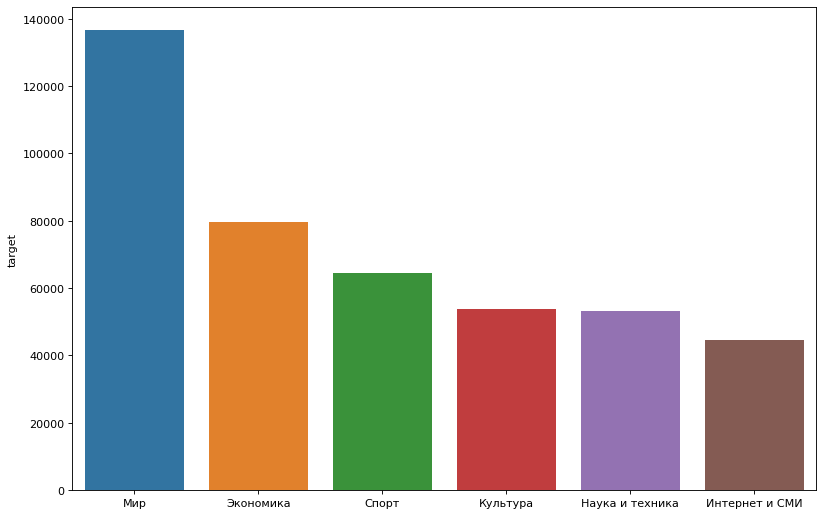

In [16]:
# Смотрим на распределение классов
figure(figsize=(12, 8), dpi=80)
sns.barplot(x=df_clean['target'].value_counts().index, y= df_clean['target'].value_counts());

## Часть 2

In [8]:
# Разбиваем наш df на train&valid части.
X_train, X_valid, y_train, y_valid = train_test_split(df_clean['news'], df_clean['target'], test_size=0.1, random_state=42)

In [9]:
# Смотрим на размерность
print(X_train.shape, X_valid.shape)

(388942,) (43216,)


In [10]:
# Искусственно понижаем кол-во выборки train части и повышаем test часть.
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [11]:
# Смотрим на размерность
print(X_train.shape, X_test.shape)

(311153,) (77789,)


In [13]:
# Создаем переменную нашего Pipelin'a
sgd_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf', SGDClassifier(random_state=42))
])

In [14]:
sgd_ppl_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('sgd_clf', SGDClassifier(random_state=42))])

In [15]:
# Смотрим на результат метрик
predicted_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

                 precision    recall  f1-score   support

 Интернет и СМИ       0.72      0.90      0.80      6437
       Культура       0.94      0.92      0.93      9674
            Мир       0.95      0.90      0.93     25922
Наука и техника       0.88      0.91      0.90      9424
          Спорт       0.98      0.98      0.98     11776
      Экономика       0.94      0.92      0.93     14556

       accuracy                           0.92     77789
      macro avg       0.90      0.92      0.91     77789
   weighted avg       0.92      0.92      0.92     77789



In [16]:
# Создаем переменную нашего Pipelin'a №2
log_ppl_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('sgd_clf',  LogisticRegression())
])

In [17]:
log_ppl_clf.fit(X_train, y_train)

/home/tabqui-acer/miniforge3/envs/NeuralNetwork/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('sgd_clf', LogisticRegression())])

In [18]:
# Смотрим на результат метрик
predicted_log = log_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_log, y_test))

                 precision    recall  f1-score   support

 Интернет и СМИ       0.83      0.88      0.86      7615
       Культура       0.95      0.94      0.94      9628
            Мир       0.96      0.93      0.94     25125
Наука и техника       0.90      0.93      0.92      9484
          Спорт       0.98      0.98      0.98     11689
      Экономика       0.94      0.95      0.95     14248

       accuracy                           0.94     77789
      macro avg       0.93      0.93      0.93     77789
   weighted avg       0.94      0.94      0.94     77789



### Я думаю, что сейчас SGD и tF-iDF можно оптимизировать с помощью GridSearchCV, верно?

In [17]:
# Grid for SGD model
parameters = {'sgd_clf__loss':['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'sgd_clf__loss':['log', 'squared_hinge', 'perceptron'],
              'sgd_clf__class_weight':[None, 'balanced'],
              'tfidf__strip_accents':['ascii', 'unicode', None],
               'tfidf__ngram_range':[(1,2), (1,3), (1,4)]
              }
model = GridSearchCV(sgd_ppl_clf, parameters, cv=4, n_jobs=-1).fit(X_train, y_train)

In [ ]:
print('Best score and parameter combination:')
print(model.best_score_, model.best_params_) 

In [ ]:
# Grid for tF-iDF with LogReg
log_parameters = {
              'tfidf__strip_accents':['ascii', 'unicode', None],
               'tfidf__ngram_range':[(1,2), (1,3), (1,4)]
              }
log_model = GridSearchCV(log_ppl_clf, parameters, cv=4, n_jobs=-1).fit(X_train, y_train)

In [ ]:
print('Best score and parameter combination:')
print(model.best_score_, model.best_params_) 

In [ ]:
# New score metrics 1
predicted_sgd = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_sgd, y_test))

In [ ]:
# New score metrics 2
predicted_log = sgd_ppl_clf.predict(X_test)
print(metrics.classification_report(predicted_log, y_test))

### Возьмем текстовую модель LSTM

## Часть 3

In [4]:
stop_words2 = set(stopwords.words('russian'))

In [5]:
# Функция предобработки текста
def clean2(text):
    # Перевод в нижний регистр.
    text = text.lower()
    # При импортировании DF появились маска.
    text = text.replace('<?xml version="1.0" encoding="utf-8"?>\n<conversion><person>', '', 1) 
    text = text.replace('</person></conversion>', '', 2)
    text = text.replace('\xa0', ' ', 2)
    text = text.replace('\n', ' ', 2)
    # Удаляем ссылки.
    text = re.sub(r'www\S+', "", text) 
    text = re.sub(r"(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)", "", text)
    # Удаляем упоминания пользователей и хэштеги.
    text = re.sub(r'@\w+','',text) 
    text = re.sub(r'#\w+', '', text)
    # Удаляем числа и знаки пунктуации.
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'<.*?>','', text)
    text = re.sub(r'«*»*:*,*"*-*','', text) 
    text = text.strip(' ')
    text = [word for word in text.split() if word not in stop_words2] #del stopword
    text = ' '.join(text)
    
    return text

In [6]:
df['title'] = df['title'].apply(clean2)

In [7]:
df.head(5)

,title,text,topic
0,британцы отмечают двухлетие смерти дианы,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир
1,одно землетрясение турции человек погиб около ...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир
2,российские националбольшевики убирают территор...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир
3,киргизия ведет бои границах таджикистаном узбе...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир
4,литва засудила участников переворота года,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир


### Обычно при токенизации и сопоставлении целых чисел словам принцип такой: наиболее популярным словам соответсвуют меньшие индексы (но ноль зарезервирован – об этом ниже).

In [8]:
corpus = [word for text in df['title'] for word in text.split()]
count_words = Counter(corpus)
sorted_words = count_words.most_common()

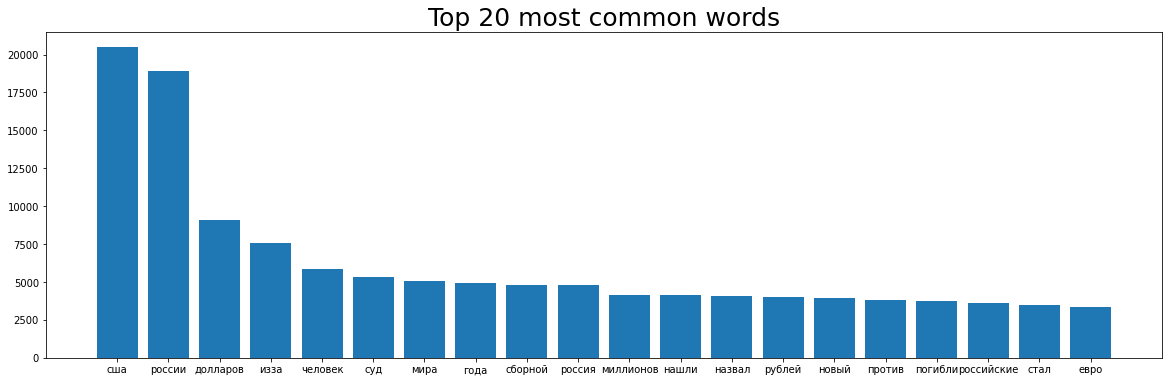

In [38]:
keys = []
values = []
for key, value in sorted_words[:20]:
    keys.append(key)
    values.append(value)
    
plt.figure(figsize=(20, 6))
plt.bar(keys, values)
plt.title('Top 20 most common words', size=25)
plt.show()

In [10]:
# Сопоставляем каждому слову в словаре целое число – эти данные пойдут в нейросеть.
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

reviews_int = []
for text in df['title']:
    r = [vocab_to_int[word] for word in text.split()]
    reviews_int.append(r)

print(reviews_int[:1])
df['title_int'] = reviews_int

[[481, 16636, 48780, 190, 4898]]


In [12]:
le = LabelEncoder()

In [18]:
df['topic_int'] = le.fit_transform(df['topic'])

In [13]:
# Все titl'ы состоят из разного числа слова: для удобства можно подсчитать длину всех отзывов:
review_len = [len(x) for x in reviews_int]
df['title_len'] = review_len
df.head()

,title,text,topic,title_int,title_len
0,британцы отмечают двухлетие смерти дианы,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир,"[481, 16636, 48780, 190, 4898]",5
1,одно землетрясение турции человек погиб около ...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир,"[4285, 413, 120, 5, 241, 812, 999]",7
2,российские националбольшевики убирают территор...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир,"[18, 48781, 48782, 5060, 19309]",5
3,киргизия ведет бои границах таджикистаном узбе...,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир,"[11432, 6651, 4020, 22921, 48783, 38966]",6
4,литва засудила участников переворота года,"<?xml version=""1.0"" encoding=""utf-8""?>\n<conve...",Мир,"[3739, 28630, 938, 3898, 8]",5


count    432158.000000
mean          6.086693
std           1.297241
min           0.000000
25%           5.000000
50%           6.000000
75%           7.000000
max          14.000000
Name: title_len, dtype: float64


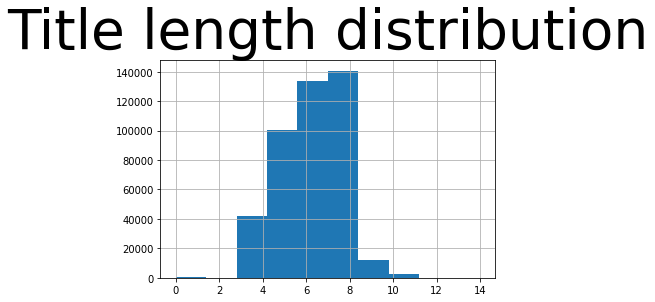

In [14]:
print(df['title_len'].describe())

df['title_len'].hist()
plt.title('Title length distribution', size=55)
plt.show()

### Padding

In [15]:
def padding(review_int, seq_len):
    '''
    Делаем padding, если длинна меньше seq_len, 
    если больше – берем первые seq_len индексов
    '''
    features = np.zeros((len(reviews_int), seq_len), dtype = int)
    for i, review in enumerate(review_int):
        if len(review) <= seq_len:
            zeros = list(np.zeros(seq_len - len(review)))
            new = zeros + review
        else:
            new = review[: seq_len]
        features[i, :] = np.array(new)
            
    return features

In [16]:
features = padding(reviews_int, 7)
print(features[0, :])

[    0     0   481 16636 48780   190  4898]


In [22]:
X_train, X_remain, y_train, y_remain = train_test_split(features, df['topic_int'].to_numpy(), test_size=0.2, random_state=1)
X_valid, X_test, y_valid, y_test = train_test_split(X_remain, y_remain, test_size=0.5, random_state=1)

In [24]:
# create tensor dataset
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
# valid_data = TensorDataset(torch.from_numpy(X_valid), torch.from_numpy(y_valid))

train_loader = DataLoader(train_data, shuffle=True, batch_size=1024)
test_loader = DataLoader(test_data, shuffle=True, batch_size=1024)
# valid_loader = DataLoader(valid_data, shuffle=True, batch_size=1024)

In [25]:
for X, Y in train_loader:
    print(X.shape, Y.shape)
    break

torch.Size([1024, 7]) torch.Size([1024])


In [29]:
target_classes = ["Мир", "Экономика", "Спорт", "Культура", "Интернет и СМИ", "Наука и техника"]
max_words = 7

In [26]:
embed_len = 50
hidden_dim = 75
n_layers=1

class LSTMClassifier(nn.Module):
    def __init__(self):
        super(LSTMClassifier, self).__init__()
        self.embedding_layer = nn.Embedding(num_embeddings=len(features), embedding_dim=embed_len)
        self.lstm = nn.LSTM(input_size=embed_len, hidden_size=hidden_dim, num_layers=n_layers, batch_first=True)
        self.linear = nn.Linear(hidden_dim, len(target_classes))

    def forward(self, X_batch):
        embeddings = self.embedding_layer(X_batch)
        hidden, carry = torch.randn(n_layers, len(X_batch), hidden_dim), torch.randn(n_layers, len(X_batch), hidden_dim)
        output, (hidden, carry) = self.lstm(embeddings, (hidden, carry))
        return self.linear(output[:,-1])

In [27]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [30]:
lstm_classifier = LSTMClassifier()
lstm_classifier

LSTMClassifier(
  (embedding_layer): Embedding(432158, 50)
  (lstm): LSTM(50, 75, batch_first=True)
  (linear): Linear(in_features=75, out_features=6, bias=True)
)

In [31]:
for layer in lstm_classifier.children():
    print("Layer : {}".format(layer))
    print("Parameters : ")
    for param in layer.parameters():
        print(param.shape)
    print()

Layer : Embedding(432158, 50)
Parameters : 
torch.Size([432158, 50])

Layer : LSTM(50, 75, batch_first=True)
Parameters : 
torch.Size([300, 50])
torch.Size([300, 75])
torch.Size([300])
torch.Size([300])

Layer : Linear(in_features=75, out_features=6, bias=True)
Parameters : 
torch.Size([6, 75])
torch.Size([6])



In [32]:
out = lstm_classifier(torch.randint(0, len(features), (1024, max_words)))
out.shape

torch.Size([1024, 6])

In [33]:
def CalcValLossAndAccuracy(model, loss_fn, val_loader):
    with torch.no_grad():
        Y_shuffled, Y_preds, losses = [],[],[]
        for X, Y in val_loader:
            preds = model(X)
            loss = loss_fn(preds, Y)
            losses.append(loss.item())

            Y_shuffled.append(Y)
            Y_preds.append(preds.argmax(dim=-1))

        Y_shuffled = torch.cat(Y_shuffled)
        Y_preds = torch.cat(Y_preds)

        print("Valid Loss : {:.3f}".format(torch.tensor(losses).mean()))
        print("Valid Acc  : {:.3f}".format(accuracy_score(Y_shuffled.detach().numpy(), Y_preds.detach().numpy())))


def TrainModel(model, loss_fn, optimizer, train_loader, val_loader, epochs=10):
    for i in range(1, epochs+1):
        losses = []
        for X, Y in tqdm(train_loader):
            Y_preds = model(X) # Predictions

            loss = loss_fn(Y_preds, Y) # Loss
            losses.append(loss.item())

            optimizer.zero_grad() # Clear gradients
            loss.backward() # Calculates Gradients
            optimizer.step() # Update network weights.

        print("Train Loss : {:.3f}".format(torch.tensor(losses).mean()))
        CalcValLossAndAccuracy(model, loss_fn, val_loader)

In [34]:
epochs = 13
learning_rate = 1e-3

loss_fn = nn.CrossEntropyLoss()
lstm_classifier = LSTMClassifier()
optimizer = Adam(lstm_classifier.parameters(), lr=learning_rate)

TrainModel(lstm_classifier, loss_fn, optimizer, train_loader, test_loader, epochs)

100%|██████████| 338/338 [01:00<00:00,  5.57it/s]


Train Loss : 1.380
Valid Loss : 1.040
Valid Acc  : 0.627


100%|██████████| 338/338 [00:59<00:00,  5.66it/s]


Train Loss : 0.849
Valid Loss : 0.748
Valid Acc  : 0.745


100%|██████████| 338/338 [00:58<00:00,  5.79it/s]


Train Loss : 0.619
Valid Loss : 0.621
Valid Acc  : 0.792


100%|██████████| 338/338 [00:57<00:00,  5.87it/s]


Train Loss : 0.495
Valid Loss : 0.557
Valid Acc  : 0.816


100%|██████████| 338/338 [00:59<00:00,  5.73it/s]


Train Loss : 0.414
Valid Loss : 0.520
Valid Acc  : 0.829


100%|██████████| 338/338 [00:59<00:00,  5.67it/s]


Train Loss : 0.353
Valid Loss : 0.499
Valid Acc  : 0.838


100%|██████████| 338/338 [01:01<00:00,  5.50it/s]


Train Loss : 0.303
Valid Loss : 0.486
Valid Acc  : 0.844


100%|██████████| 338/338 [01:03<00:00,  5.32it/s]


Train Loss : 0.263
Valid Loss : 0.485
Valid Acc  : 0.845


100%|██████████| 338/338 [00:59<00:00,  5.72it/s]


Train Loss : 0.228
Valid Loss : 0.490
Valid Acc  : 0.848


100%|██████████| 338/338 [00:58<00:00,  5.76it/s]


Train Loss : 0.199
Valid Loss : 0.499
Valid Acc  : 0.849


100%|██████████| 338/338 [00:58<00:00,  5.80it/s]


Train Loss : 0.172
Valid Loss : 0.511
Valid Acc  : 0.848


100%|██████████| 338/338 [00:58<00:00,  5.81it/s]


Train Loss : 0.148
Valid Loss : 0.532
Valid Acc  : 0.847


100%|██████████| 338/338 [00:58<00:00,  5.77it/s]


Train Loss : 0.128
Valid Loss : 0.556
Valid Acc  : 0.847


In [35]:
# Функция метрик
def MakePredictions(model, loader):
    Y_shuffled, Y_preds = [], []
    for X, Y in loader:
        preds = model(X)
        Y_preds.append(preds)
        Y_shuffled.append(Y)
    gc.collect()
    Y_preds, Y_shuffled = torch.cat(Y_preds), torch.cat(Y_shuffled)

    return Y_shuffled.detach().numpy(), F.softmax(Y_preds, dim=-1).argmax(dim=-1).detach().numpy()

Y_actual, Y_preds = MakePredictions(lstm_classifier, test_loader)

In [37]:
print("Test Accuracy : {}".format(accuracy_score(Y_actual, Y_preds)))
print("\nClassification Report : ")
print(classification_report(Y_actual, Y_preds, target_names=target_classes))

Test Accuracy : 0.8481118104405776

Classification Report : 
                 precision    recall  f1-score   support

            Мир       0.72      0.68      0.70      4397
      Экономика       0.84      0.82      0.83      5464
          Спорт       0.87      0.88      0.88     13614
       Культура       0.79      0.78      0.79      5321
 Интернет и СМИ       0.94      0.93      0.94      6431
Наука и техника       0.85      0.87      0.86      7989

       accuracy                           0.85     43216
      macro avg       0.83      0.83      0.83     43216
   weighted avg       0.85      0.85      0.85     43216

